[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_15836\3576141838.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Dataset Preview:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.347172  24.817057  23.906236  24.805922  212818400
2015-01-05  23.661276  24.195743  23.474213  24.115573  257142000
2015-01-06  23.663502  23.924054  23.300509  23.725856  263188400
2015-01-07  23.995316  24.095527  23.761486  23.872833  160423600
2015-01-08  24.917261  24.975162  24.206866  24.324895  237458000


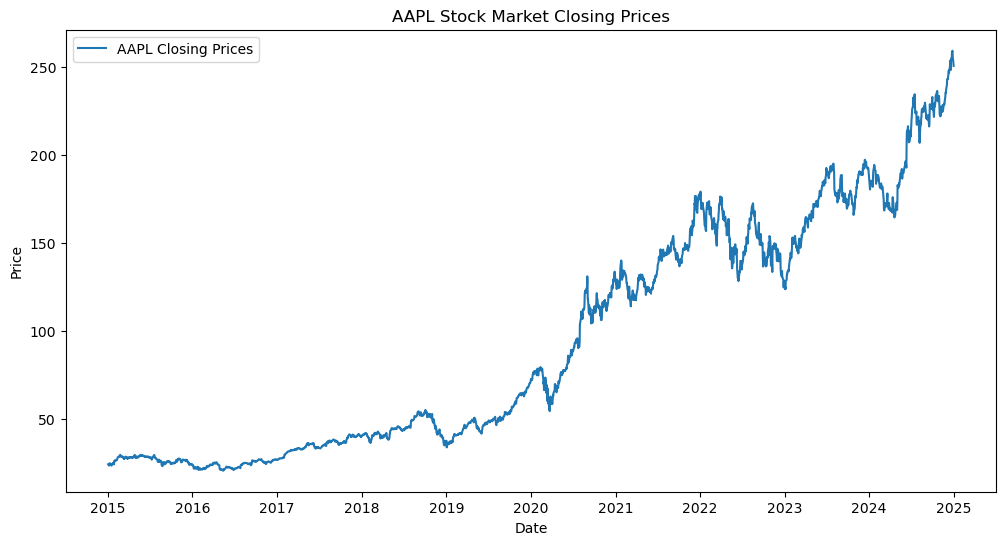

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0132
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 3.0160e-04
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 2.6046e-04
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.6167e-04
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.4583e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


ValueError: Length of values (444) does not match length of index (504)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Fetch stock data from Yahoo Finance
stock_ticker = "AAPL"  # Replace with the ticker symbol you want (e.g., "TSLA" or "MSFT")
stock_data = yf.download(stock_ticker, start="2015-01-01", end="2025-01-01")

# Display the first few rows of the dataset
print("Dataset Preview:")
print(stock_data.head())

# Use 'Close' prices for prediction
data = stock_data[['Close']]
data.dropna(inplace=True)

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(data, label=f'{stock_ticker} Closing Prices')
plt.title(f'{stock_ticker} Stock Market Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Prepare data for LSTM model
close_prices = data.values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Define training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(seq_length, len(data)):
        sequences.append(data[i - seq_length:i])
        labels.append(data[i])
    return np.array(sequences), np.array(labels)

sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=5)

# Predict and scale back the values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the predictions
train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = predictions

plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Training Data')
plt.plot(valid[['Close', 'Predictions']])
plt.title(f'{stock_ticker} Stock Market Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Actual Prices', 'Predictions'])
plt.show()


[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_15836\3094329939.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Dataset Preview:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.347172  24.817057  23.906236  24.805922  212818400
2015-01-05  23.661276  24.195743  23.474213  24.115573  257142000
2015-01-06  23.663502  23.924054  23.300509  23.725856  263188400
2015-01-07  23.995316  24.095527  23.761486  23.872833  160423600
2015-01-08  24.917261  24.975162  24.206866  24.324895  237458000


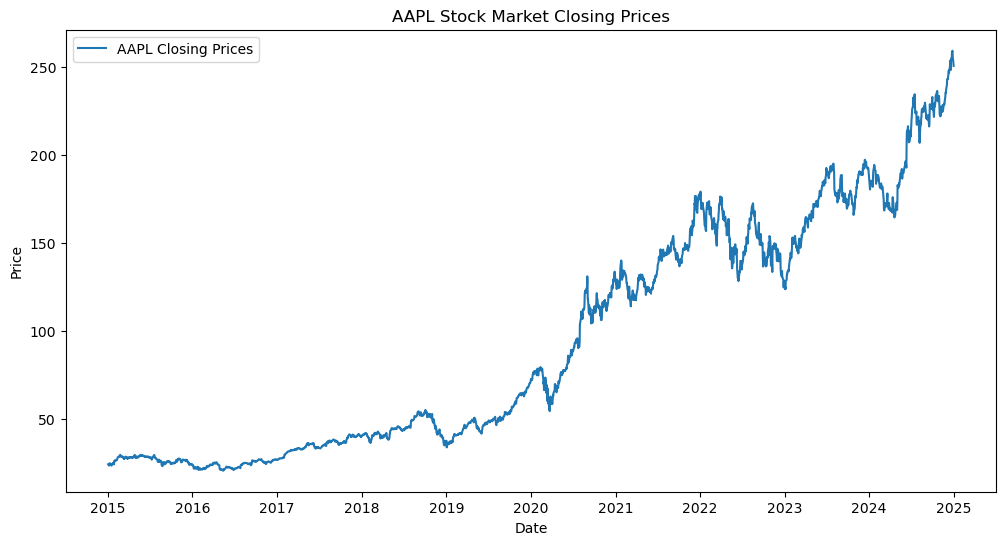

Epoch 1/5


C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.0126
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.2877e-04
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.7306e-04
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 2.2828e-04
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.4332e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


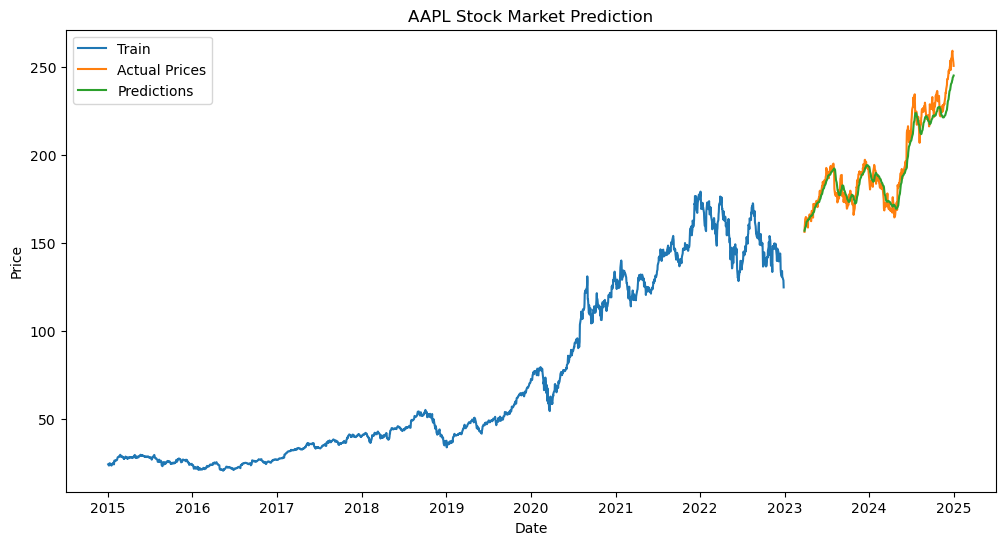

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Fetch stock data from Yahoo Finance
stock_ticker = "AAPL"  # Replace with the ticker symbol you want (e.g., "TSLA" or "MSFT")
stock_data = yf.download(stock_ticker, start="2015-01-01", end="2025-01-01")

# Display the first few rows of the dataset
print("Dataset Preview:")
print(stock_data.head())

# Use 'Close' prices for prediction
data = stock_data[['Close']]
data.dropna(inplace=True)

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(data, label=f'{stock_ticker} Closing Prices')
plt.title(f'{stock_ticker} Stock Market Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Prepare data for LSTM model
close_prices = data.values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Define training and test datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for LSTM
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(seq_length, len(data)):
        sequences.append(data[i - seq_length:i])
        labels.append(data[i])
    return np.array(sequences), np.array(labels)

sequence_length = 60
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=5)

# Predict and scale back the values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the predictions
train = data[:train_size]
valid = data[train_size:]

# Ensure alignment between valid data and predictions
valid = valid.iloc[sequence_length:]

# Assign predictions
valid['Predictions'] = predictions

plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Training Data')
plt.plot(valid[['Close', 'Predictions']])
plt.title(f'{stock_ticker} Stock Market Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Actual Prices', 'Predictions'])
plt.show()
